Task 4:Analyze and visualize sentiment patterns in social media data to understand public opinion and attitudes towards specific topics or brands.

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [10]:
col=['Id','Entity','Sentiment','Content']
df_train=pd.read_csv('twitter_training.csv',names=col)

In [11]:
df_train

,Id,Entity,Sentiment,Content
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
...,...,...,...,...
74677,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74678,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74679,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74680,9200,Nvidia,Positive,Just realized between the windows partition of...


In [12]:
df_test=pd.read_csv("twitter_validation.csv" , names=col)

In [13]:
df_test

,Id,Entity,Sentiment,Content
0,3364,Facebook,Irrelevant,I mentioned on Facebook that I was struggling ...
1,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
3,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
4,4433,Google,Neutral,Now the President is slapping Americans in the...
...,...,...,...,...
995,4891,GrandTheftAuto(GTA),Irrelevant,⭐️ Toronto is the arts and culture capital of ...
996,4359,CS-GO,Irrelevant,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...
997,2652,Borderlands,Positive,Today sucked so it’s time to drink wine n play...
998,8069,Microsoft,Positive,Bought a fraction of Microsoft today. Small wins.


In [14]:
df_train.shape

(74682, 4)

In [15]:
df_train.describe

<bound method NDFrame.describe of          Id       Entity Sentiment  \
0      2401  Borderlands  Positive   
1      2401  Borderlands  Positive   
2      2401  Borderlands  Positive   
3      2401  Borderlands  Positive   
4      2401  Borderlands  Positive   
...     ...          ...       ...   
74677  9200       Nvidia  Positive   
74678  9200       Nvidia  Positive   
74679  9200       Nvidia  Positive   
74680  9200       Nvidia  Positive   
74681  9200       Nvidia  Positive   

                                                 Content  
0      im getting on borderlands and i will murder yo...  
1      I am coming to the borders and I will kill you...  
2      im getting on borderlands and i will kill you ...  
3      im coming on borderlands and i will murder you...  
4      im getting on borderlands 2 and i will murder ...  
...                                                  ...  
74677  Just realized that the Windows partition of my...  
74678  Just realized that my Mac wind

In [16]:
# Cleaning the Data

df_train.isnull().sum()

Id             0
Entity         0
Sentiment      0
Content      686
dtype: int64

In [17]:
df_train.dropna(subset=['Content'] , inplace=True)

In [18]:
df_train.shape

(73996, 4)

In [19]:
df_train.Sentiment.unique()

array(['Positive', 'Neutral', 'Negative', 'Irrelevant'], dtype=object)

In [20]:
df_test.Sentiment.unique()

array(['Irrelevant', 'Neutral', 'Negative', 'Positive'], dtype=object)

In [21]:
df_train.Sentiment=df_train.Sentiment.replace('Irrelevant' , 'Neutral')
df_test.Sentiment=df_test.Sentiment.replace('Irrelevant' , 'Neutral')

In [22]:
df_train.Sentiment.unique()

array(['Positive', 'Neutral', 'Negative'], dtype=object)

In [23]:
df_test.Sentiment.unique()

array(['Neutral', 'Negative', 'Positive'], dtype=object)

In [24]:
# EDA

sentiment_count=df_train.Sentiment.value_counts()
sentiment_count

Sentiment
Neutral     30983
Negative    22358
Positive    20655
Name: count, dtype: int64

In [25]:
df_train.Entity.unique()

array(['Borderlands', 'CallOfDutyBlackopsColdWar', 'Amazon', 'Overwatch',
       'Xbox(Xseries)', 'NBA2K', 'Dota2', 'PlayStation5(PS5)',
       'WorldOfCraft', 'CS-GO', 'Google', 'AssassinsCreed', 'ApexLegends',
       'LeagueOfLegends', 'Fortnite', 'Microsoft', 'Hearthstone',
       'Battlefield', 'PlayerUnknownsBattlegrounds(PUBG)', 'Verizon',
       'HomeDepot', 'FIFA', 'RedDeadRedemption(RDR)', 'CallOfDuty',
       'TomClancysRainbowSix', 'Facebook', 'GrandTheftAuto(GTA)',
       'MaddenNFL', 'johnson&johnson', 'Cyberpunk2077',
       'TomClancysGhostRecon', 'Nvidia'], dtype=object)

In [26]:
Entity_count=df_train.Entity.value_counts()
Entity_count

Entity
MaddenNFL                            2377
LeagueOfLegends                      2377
CallOfDuty                           2376
Verizon                              2365
TomClancysRainbowSix                 2364
Facebook                             2362
Microsoft                            2361
Dota2                                2359
WorldOfCraft                         2357
ApexLegends                          2353
NBA2K                                2343
CallOfDutyBlackopsColdWar            2343
FIFA                                 2324
johnson&johnson                      2324
TomClancysGhostRecon                 2321
Battlefield                          2316
Overwatch                            2316
GrandTheftAuto(GTA)                  2293
HomeDepot                            2292
PlayStation5(PS5)                    2291
Hearthstone                          2286
CS-GO                                2284
Xbox(Xseries)                        2283
Borderlands                

In [27]:
Entity_sort=Entity_count.sort_values(ascending=False)

In [28]:
Entity_top10=Entity_sort.head(10)
Entity_top10

Entity
MaddenNFL               2377
LeagueOfLegends         2377
CallOfDuty              2376
Verizon                 2365
TomClancysRainbowSix    2364
Facebook                2362
Microsoft               2361
Dota2                   2359
WorldOfCraft            2357
ApexLegends             2353
Name: count, dtype: int64

In [29]:
Entity_index=Entity_top10.index

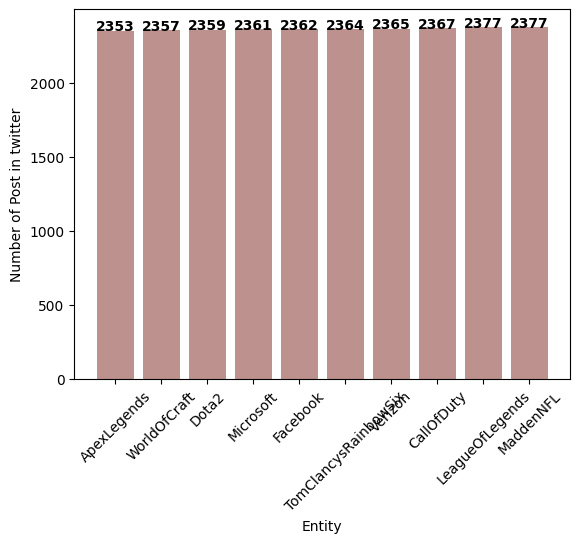

In [30]:
# plt.figure(figsize=(13,5))

x=['ApexLegends' , 'WorldOfCraft' , 'Dota2' , 'Microsoft' , 'Facebook' , 'TomClancysRainbowSix' , 'Verizon' , 'CallOfDuty' , 'LeagueOfLegends' , 'MaddenNFL']
y=[2353,2357,2359,2361,2362,2364,2365,2367,2377,2377]

plt.bar( x , y , alpha=0.7 , color='#A2625D')

for i,v in enumerate(y):
    plt.text(i,v,str(v),ha='center',weight='bold' )

plt.xticks(rotation=45)
plt.xlabel('Entity')
plt.ylabel('Number of Post in twitter')
plt.show()

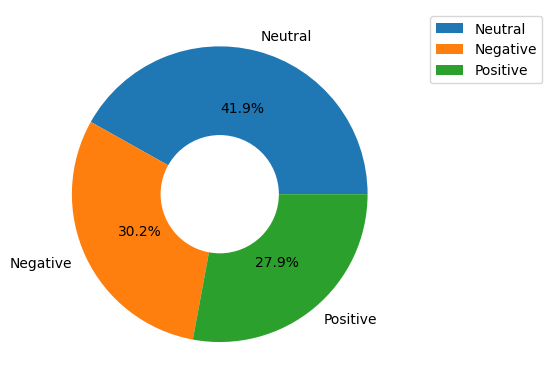

In [31]:
y=['Neutral' , 'Negative' , 'Positive']
plt.pie(sentiment_count , labels=y, autopct='%0.1f%%' )
circle=plt.Circle((0,0),0.4, facecolor='white')
plt.gca().add_patch(circle)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [32]:
# Evaluation

In [33]:
df_train.drop(['Id'] , axis=1 , inplace=True)
df_test.drop(['Id'] , axis=1 , inplace=True)

In [34]:
#train test split
X_train=df_train.drop(['Sentiment'] , axis=1)
X_test=df_test.drop(['Sentiment'] , axis=1)
y_train=df_train['Sentiment']
y_test=df_test['Sentiment']

In [35]:
from sklearn.feature_extraction.text import CountVectorizer
vec=CountVectorizer()
X_train_count=vec.fit_transform(X_train.Content)

In [36]:
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()
y_train=label.fit_transform(y_train)
y_test=label.fit_transform(y_test)

In [37]:
from sklearn.naive_bayes import MultinomialNB
multimodel=MultinomialNB()
multimodel.fit(X_train_count,y_train)

MultinomialNB()

In [38]:
X_test_count=vec.transform(X_test.Content)
X_test_count.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [39]:
multimodel.score(X_test_count,y_test)

0.846